In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Setup

In [2]:
first_data = pd.read_csv('DataSets/spam.csv')
second_data = pd.read_csv('DataSets/spam_ham_dataset.csv')

In [3]:
first_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
second_data.head(100)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
95,2432,ham,Subject: take 30 % off with our super ticket !...,0
96,2012,ham,Subject: updated list\r\nvalero deals have now...,0
97,2862,ham,"Subject: hpl nom for march 27 , 2001\r\n( see ...",0
98,4095,spam,Subject: what she doesnt know sprig bashaw\r\n...,1


In [5]:
# Working With First Data
first_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
first_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
first_data.rename(columns={'v1': "Label", 'v2': "Text"}, inplace=True)

In [8]:
# Working With Second Data
second_data.drop(columns=['Unnamed: 0', 'label_num'], inplace=True)

In [9]:
second_data.rename(columns={'label': "Label", 'text': "Text"}, inplace=True)

In [10]:
first_data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
second_data.head()

,Label,Text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [12]:
# Creating One Dataset From Two Datasets
frames = [first_data, second_data]
df = pd.concat(frames)

In [13]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
first_data.shape

(5572, 2)

In [15]:
second_data.shape

(5171, 2)

In [16]:
df.shape

(10743, 2)

### Clean The Data

In [17]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [18]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5166    False
5167    False
5168     True
5169    False
5170    False
Length: 10743, dtype: bool

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

### EDA

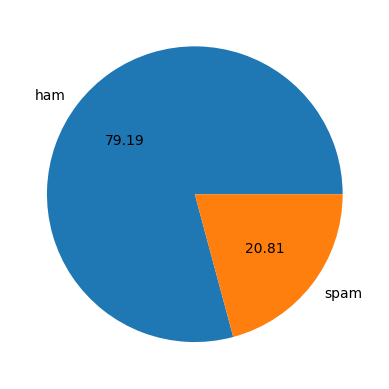

In [21]:
plt.pie(df['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
df['Label'].value_counts()

ham     8047
spam    2115
Name: Label, dtype: int64

In [23]:
df.shape

(10162, 2)

In [24]:
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['Label'] = encoder.fit_transform(df['Label'])

In [27]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
import nltk

In [29]:
df['Num_Characters'] = df['Text'].apply(len)

In [30]:

# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Label,Text,Num_Characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,Label,Text,Num_Characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['Num_Characters', 'num_words', 'num_sentences']].describe()

,Num_Characters,num_words,num_sentences
count,10162.000000,10162.000000,10162.000000
mean,565.597815,124.203700,7.577839
std,1193.322467,262.099732,20.438681
min,2.000000,1.000000,1.000000
25%,56.000000,14.000000,1.000000
50%,143.000000,31.000000,3.000000
75%,540.000000,122.000000,7.000000
max,32258.000000,8863.000000,1204.000000


In [39]:

# ham
df[df['Label'] == 0][['Num_Characters','num_words','num_sentences']].describe()

,Num_Characters,num_words,num_sentences
count,8047.000000,8047.000000,8047.000000
mean,476.117311,110.759662,6.138934
std,1037.113789,247.282194,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,26.000000,2.000000
75%,433.500000,104.000000,6.000000
max,32258.000000,8863.000000,1204.000000


In [40]:
# spam
df[df['Label'] == 1][['Num_Characters','num_words','num_sentences']].describe()

,Num_Characters,num_words,num_sentences
count,2115.000000,2115.00000,2115.000000
mean,906.046809,175.35461,13.052482
std,1613.795128,306.83937,28.350382
min,11.000000,2.00000,1.000000
25%,149.500000,29.00000,3.000000
50%,331.000000,67.00000,5.000000
75%,863.500000,174.00000,13.000000
max,22073.000000,3963.00000,693.000000


<Axes: xlabel='Num_Characters', ylabel='Count'>

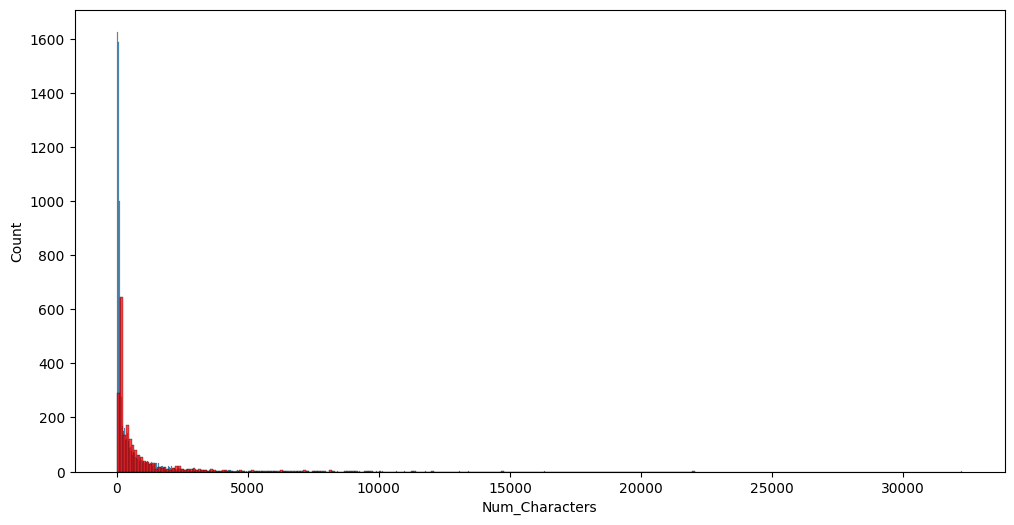

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['Num_Characters'])
sns.histplot(df[df['Label'] == 1]['Num_Characters'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

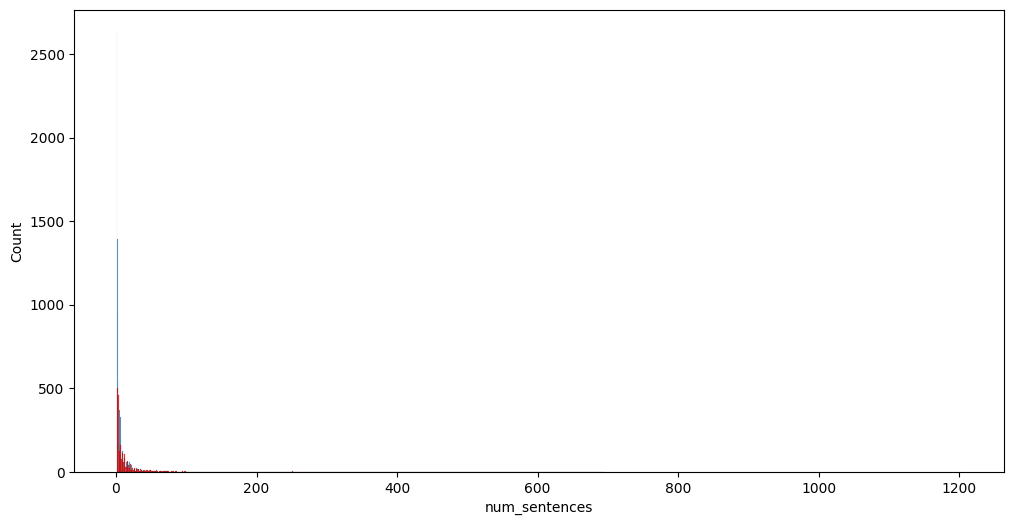

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['num_sentences'])
sns.histplot(df[df['Label'] == 1]['num_sentences'],color='red')

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['num_words'])
sns.histplot(df[df['Label'] == 1]['num_words'],color='red')

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\templ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\templ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
from nltk.corpus import stopwords
import string

### Data Preprocessing

In [89]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [90]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [93]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)